# Un clustering completo: la fase de exploración de datos

* X Dataset (array de n x m) de puntos a clusterizar
* n numero de datos
* m numero de rasgos
* Z array de enlace del cluster con info de las uniones
* k numero de clusters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage

(150, 2)


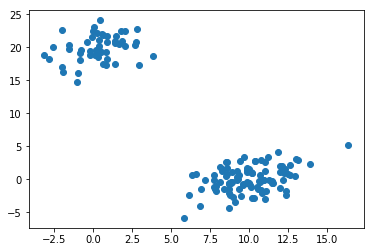

In [2]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]],size=[100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]],size=[50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0],X[:,1])

In [3]:
Z = linkage(X, "ward")
Z.shape

(149, 4)

In [4]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [5]:
c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

In [6]:
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [7]:
Z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

In [8]:
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [9]:
print(Z[152-len(X)])
print(Z[158-len(X)])

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


In [10]:
X[[33,62, 68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

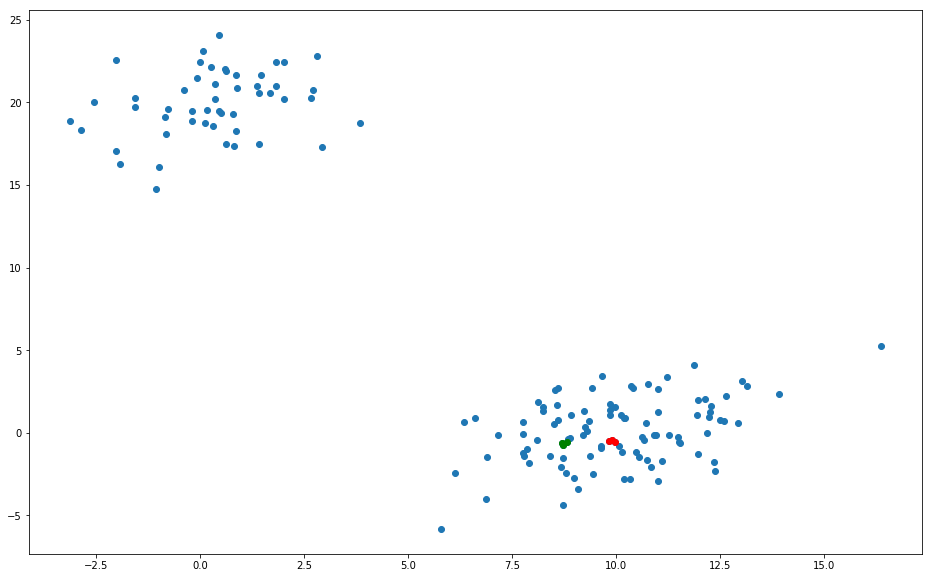

In [11]:
idx=[33,62, 68]
idx2=[15,69, 41]
plt.figure(figsize=(16,10))
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[idx,0],X[idx,1],c="r")
plt.scatter(X[idx2,0],X[idx2,1],c="g")

# Representación del dendrograma

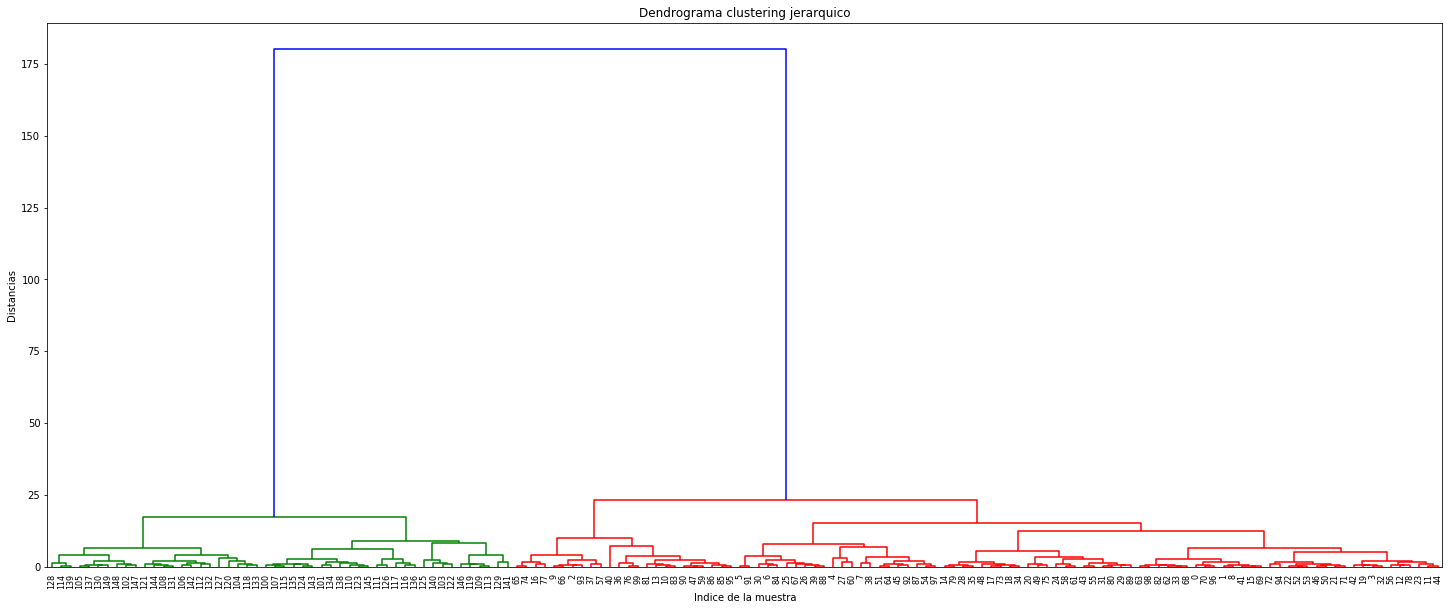

In [13]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma clustering jerarquico")
plt.xlabel("Indice de la muestra")
plt.ylabel("Distancias")
dendrogram(Z,leaf_rotation=90,leaf_font_size=8)
plt.show()

In [14]:
Z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

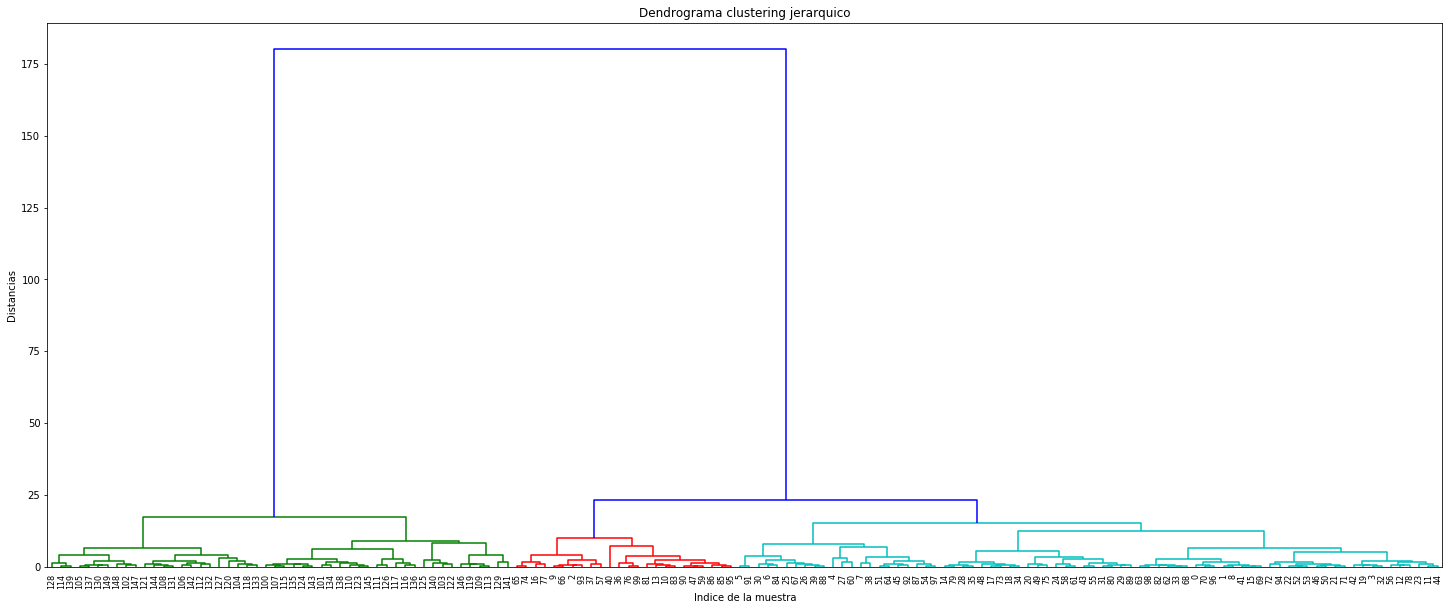

In [15]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma clustering jerarquico")
plt.xlabel("Indice de la muestra")
plt.ylabel("Distancias")
dendrogram(Z,leaf_rotation=90,leaf_font_size=8,color_threshold=0.1*180)
plt.show()

## Truncar el dendrograma

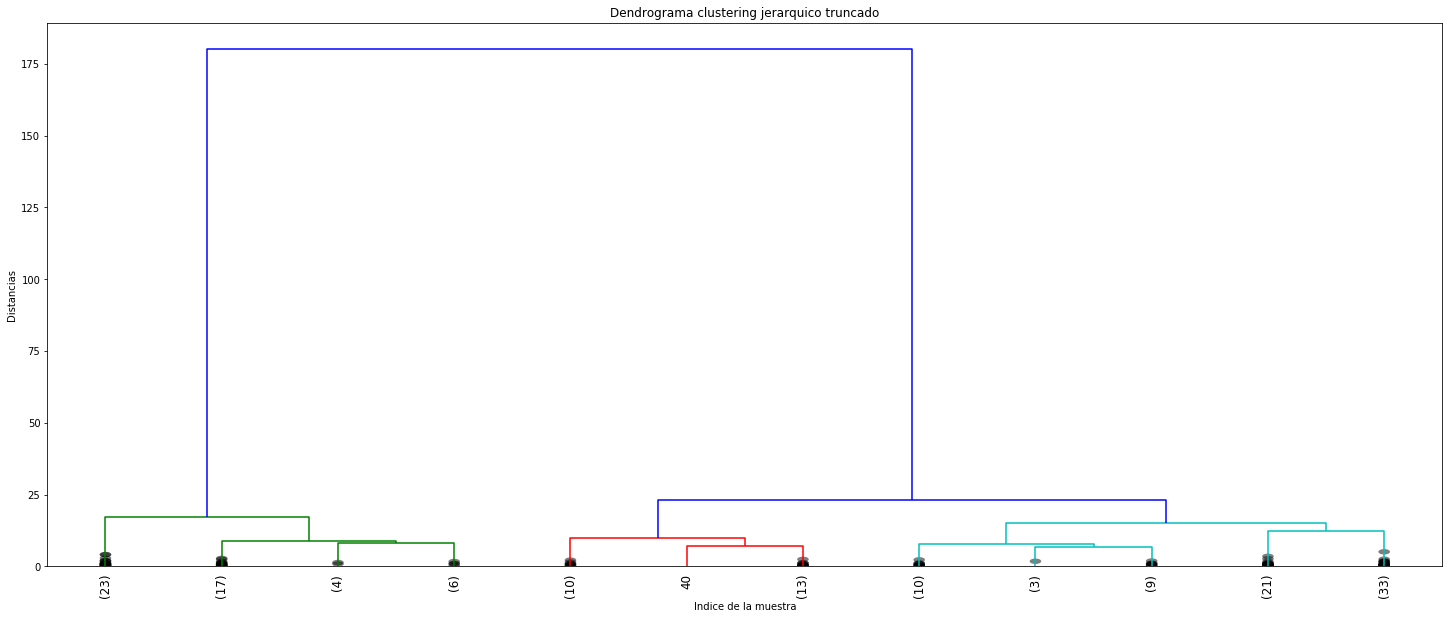

In [20]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma clustering jerarquico truncado")
plt.xlabel("Indice de la muestra")
plt.ylabel("Distancias")
dendrogram(Z,leaf_rotation=90,leaf_font_size=12,color_threshold=0.1*180, show_leaf_counts=True,show_contracted=True,
           truncate_mode="lastp",p=12 )
plt.show()

## Dendrograma personalizado

In [46]:
def dendrogram_tune(*args, **kwargs):
    max_d=kwargs.pop("max_d",None)
    if max_d and "color_threshold" not in kwargs:
        kwargs["color_threshold"] = max_d
    annotate_above = kwargs.pop("annotate_above", 0)
    
    ddata = dendrogram(*args,**kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerarquico con dendrograma truncado")
        plt.xlabel("Indice de Dataset")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'],ddata['dcoord'],ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),textcoords="offset points",va="top",ha="center")
    if max_d:
        plt.axhline(y=max_d,c='k')
        
    return ddata

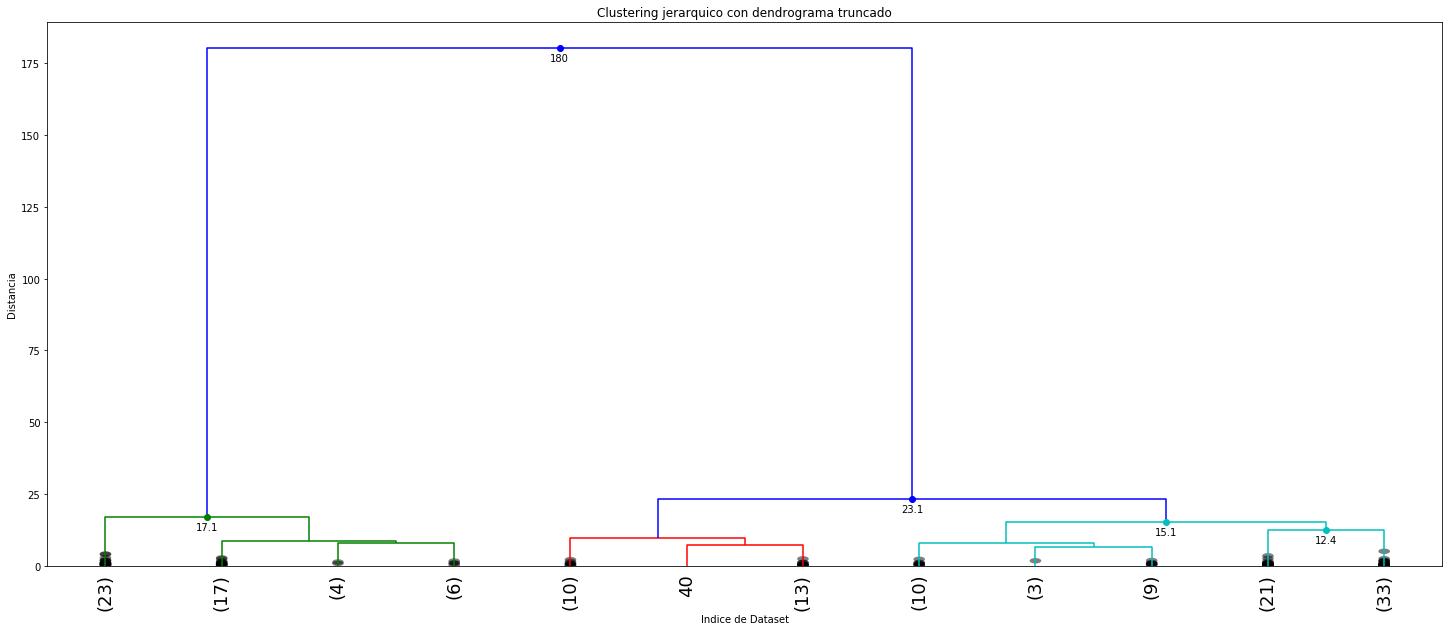

In [50]:
plt.figure(figsize=(25,10))
dendrogram_tune(Z,truncate_mode="lastp",p=12, leaf_rotation=90.,leaf_font_size=18.,show_contracted=True,annotate_above=10
               ,color_threshold=0.1*180)
plt.show()

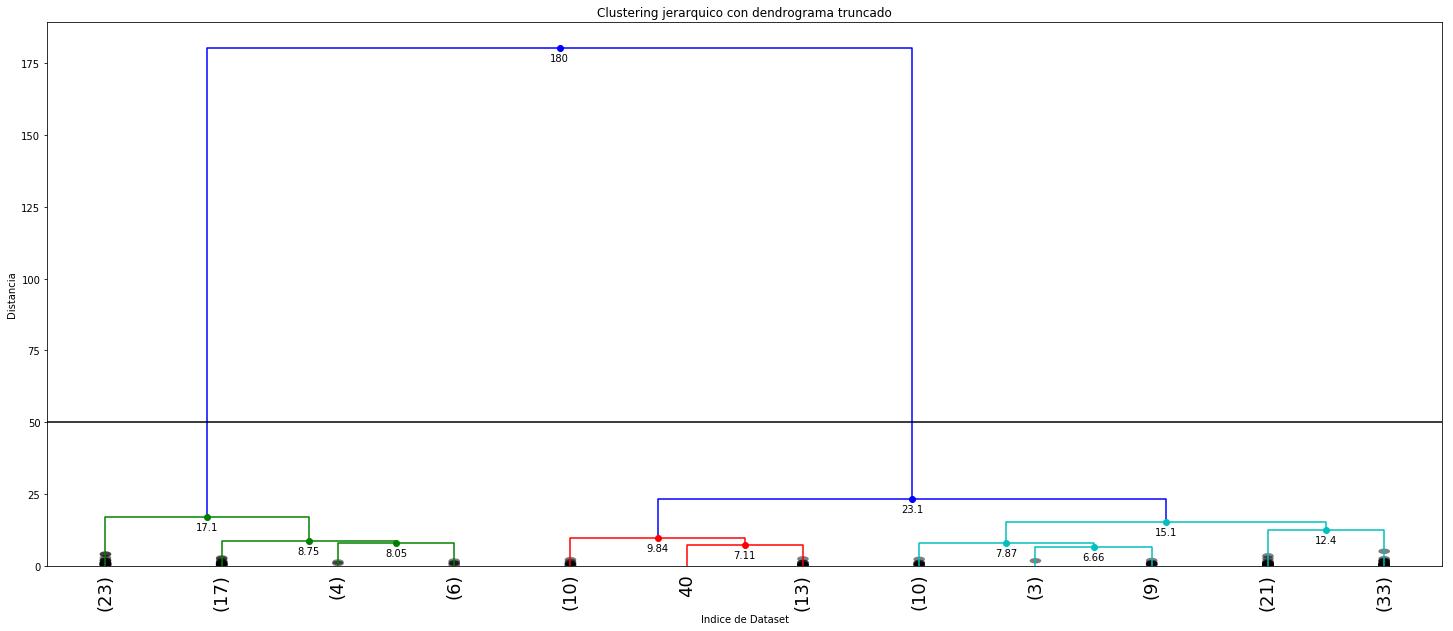

In [51]:
plt.figure(figsize=(25,10))
dendrogram_tune(Z,truncate_mode="lastp",p=12, leaf_rotation=90.,leaf_font_size=18.,show_contracted=True,max_d=50
               ,color_threshold=0.1*180)
plt.show()